In [2]:
#importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle

# Preprocessing

### Understanding data

In [3]:
# Load the dataset
df = pd.read_csv('Data.csv')

In [4]:
# data and data shape
print(df.shape)
df.head()

(5704, 25)


,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
0,2021-05-12 17:56:25,3.691772,17.661523,16941.90435,36.472670,146.285825,7925.957227,81.975757,2210.712256,224.366480,...,212.936183,1087.730999,NaN,13.118669,45.994059,0.481272,1075.254532,221.600735,36.796521,0.479000
1,2021-05-12 17:56:25,3.744628,0.193811,17554.95407,34.087434,161.762571,8049.518860,81.637472,2268.780322,0.005692,...,NaN,2.082851,1.795880,10.353929,1.580861,0.337967,2.110829,0.005584,34.238289,0.312456
2,2021-05-12 18:01:25,3.702922,17.531952,16983.41580,35.526652,NaN,7927.604542,81.534685,2212.091683,224.253433,...,213.641190,1092.204113,155.791347,13.597754,45.995841,0.480590,1086.126125,220.795548,35.678927,0.485000
3,2021-05-12 18:38:31,3.704258,17.787358,16990.58924,34.882208,147.002954,7932.062270,81.259530,2206.561905,224.181494,...,213.790424,1088.005197,158.113898,13.950920,45.997089,0.481913,1102.376863,228.013179,34.680944,0.429000
4,2021-05-12 18:49:02,3.710455,17.845446,17028.06247,34.445766,150.394003,7938.962944,81.105510,2217.517527,224.086884,...,213.517490,1101.989445,161.883438,14.185215,45.997962,NaN,1101.785918,225.502798,34.206146,0.430000


In [5]:
#Data types:
df.info()
# Timestamp to be converted to datetime, rest all are contineous numeric data types, good for modeling but need to scaled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5704 entries, 0 to 5703
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   5704 non-null   object 
 1   OxEnRa      5590 non-null   float64
 2   BlFuPeIn    5647 non-null   float64
 3   EnOxFl      5590 non-null   float64
 4   CoBlFl      5590 non-null   float64
 5   BlMo        5533 non-null   float64
 6   BlFuBoGaVo  5590 non-null   float64
 7   BlFuBoGaIn  5476 non-null   float64
 8   ThCoTe      5590 non-null   float64
 9   ToGaPr      5533 non-null   float64
 10  EnOxPr      5419 non-null   float64
 11  CoBlPr      5419 non-null   float64
 12  ToPrDr      5476 non-null   float64
 13  HoBlPr      5476 non-null   float64
 14  AcBlVe      5590 non-null   float64
 15  CoBlTe      5590 non-null   float64
 16  HoBlTe      5419 non-null   float64
 17  ToTe        5419 non-null   float64
 18  BlHu        5647 non-null   float64
 19  CoInSeVa    5419 non-null  

In [6]:
#Data Statistics
df.describe()
#Target column - SI, has some outliers. including some other columns. mean is pretty close to meadian for most signify balanced distribution.

,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,EnOxPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
count,5590.000000,5647.000000,5590.000000,5590.000000,5533.000000,5590.000000,5476.000000,5590.000000,5533.000000,5419.000000,...,5590.000000,5419.000000,5419.000000,5647.000000,5419.000000,5419.000000,5419.000000,5533.000000,5590.000000,5476.000000
mean,3.611189,13.257440,16956.306269,34.246236,150.331923,7942.011970,80.614852,2218.308424,174.579945,1.424239,...,213.337201,865.864578,147.617232,13.074340,35.702907,0.465285,866.026903,174.483555,34.247518,0.464373
std,0.185583,7.154725,2553.243358,4.955923,7.267821,92.834051,0.939073,29.271498,100.257312,0.186244,...,4.382991,494.082902,85.694718,1.456943,18.674187,0.086237,494.215937,100.212855,4.971873,0.109936
min,2.631519,0.193811,11799.387000,32.066071,118.877259,7536.104612,76.492986,2081.102063,0.005692,0.859541,...,200.465412,2.061963,1.764897,9.890486,1.512917,0.198308,2.027382,0.005578,31.637416,0.174000
25%,3.565113,16.375012,16401.649745,33.335785,146.486174,7896.178635,80.150112,2201.667093,218.922863,1.342932,...,211.321688,1028.771263,141.264238,11.912496,40.118090,0.406569,1028.572916,216.517161,33.202887,0.388000
50%,3.660988,16.975658,16956.501075,33.607712,150.727971,7956.086000,80.761833,2220.085510,221.850598,1.449395,...,214.148420,1092.558056,178.643601,13.858000,45.982225,0.463120,1090.866360,220.963696,33.595327,0.454000
75%,3.720132,17.355515,17033.996540,33.838924,154.878239,8006.055610,81.261941,2237.930667,222.949223,1.542293,...,216.154525,1112.884202,199.751517,13.874634,46.499910,0.515204,1113.935956,224.279181,33.981561,0.528407
max,3.960638,19.073889,43540.196140,83.394181,177.935836,8143.976614,82.604194,2294.422412,550.136556,1.824584,...,223.761771,2878.784210,528.465258,16.754458,48.998702,0.951751,2936.344068,546.882630,83.794425,0.957000


### Data type fixes

In [7]:
# Convert 'Timestamp' to datetime and sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp')

### Missing value treatment

In [8]:
# Finding missing values
df.isnull().sum().sort_values(ascending=False)
# almost 5% data shows missing values

EnOxPr        285
ToTe          285
CoInSeVa      285
FoSI          285
HoBl          285
CoBlPr        285
HoBlTe        285
ToPrDr        228
BlFuBoGaIn    228
SI            228
HoBlPr        228
ToGaPr        171
ToGasP        171
BlMo          171
EnOxFl        114
BlFuBoGaVo    114
OxEnRa        114
CoBlTe        114
AcBlVe        114
CoBlFl        114
ThCoTe        114
CoBF          114
BlFuPeIn       57
BlHu           57
Timestamp       0
dtype: int64

In [9]:
# as there are outliers imputing missing values with median for now
df.fillna(df.median(), inplace=True)

### Outlier Analysis and Treatment

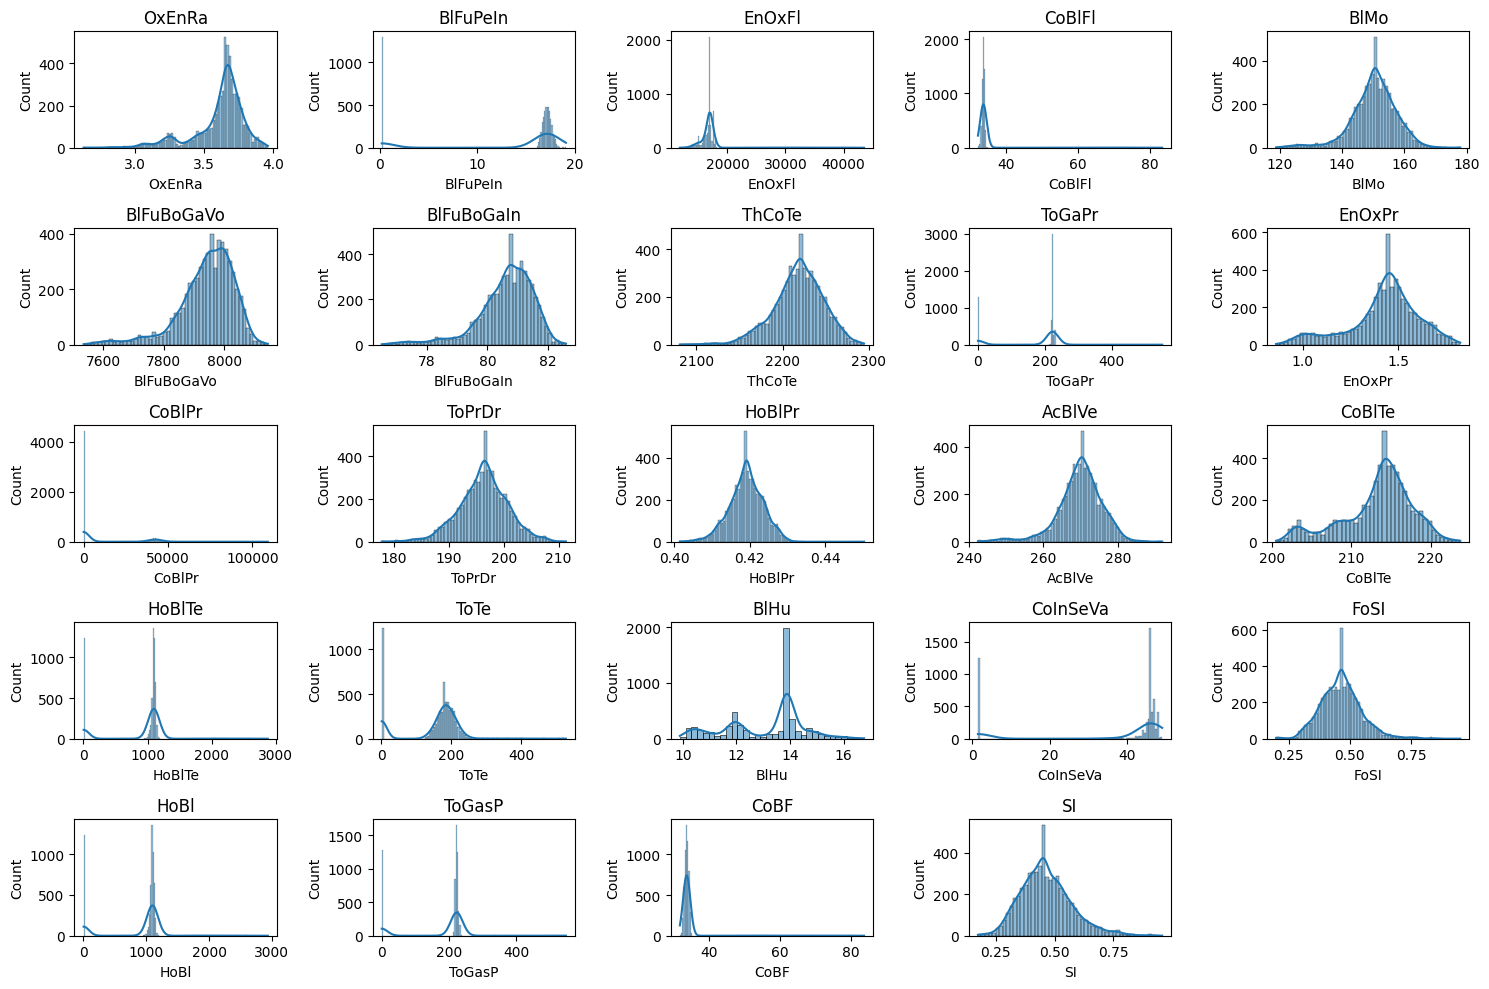

In [ ]:
# Understanding data distribution and outlier with histogram
# create a histogram for all the variables other than timestamp with sns 
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:], 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()

#Analysis: 1. Most of the variables are normally distributed incl. SI
# 2. A lot of variables have a lot of outliers

In [10]:
# Outlier treatment.
# IQR method for outlier treatment
def auto_outlier_treatment(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        # Skip if too many missing values
        if data[col].isnull().mean() > 0.3:
            continue
            
        # Skip if too few unique values (might be categorical)
        if data[col].nunique() < 10:
            continue
            
        # Apply IQR method
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers instead of removing
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    
    return data

In [11]:
df.iloc[:, 1:] = auto_outlier_treatment(df.iloc[:, 1:])
df.describe()

,Timestamp,OxEnRa,BlFuPeIn,EnOxFl,CoBlFl,BlMo,BlFuBoGaVo,BlFuBoGaIn,ThCoTe,ToGaPr,...,CoBlTe,HoBlTe,ToTe,BlHu,CoInSeVa,FoSI,HoBl,ToGasP,CoBF,SI
count,5704,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,...,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000,5704.000000
mean,2021-06-24 16:24:46.575385600,3.629520,16.657665,16771.163650,33.589674,150.521656,7945.246116,80.652757,2218.655458,220.604807,...,213.439139,1064.097439,162.047348,13.082171,43.687093,0.464020,1064.070484,219.013416,33.600041,0.462738
min,2021-05-12 17:56:25,3.344598,14.950511,15504.253634,32.605354,134.576054,7736.067820,78.598725,2148.668219,213.129170,...,204.394671,934.210217,67.610519,9.890486,35.893156,0.256407,933.581714,205.875843,32.066556,0.188363
25%,2021-06-01 22:48:28,3.568965,16.391794,16420.308872,33.342483,146.649170,7897.441059,80.183112,2202.004792,219.012365,...,211.423992,1040.810617,146.103222,11.916452,42.246583,0.409692,1040.942996,216.857700,33.211318,0.390495
50%,2021-06-25 10:02:53,3.660988,16.975658,16956.501075,33.607712,150.727971,7956.086000,80.761833,2220.085510,221.850598,...,214.148420,1092.558056,178.643601,13.858000,45.982225,0.463120,1090.866360,220.963696,33.595327,0.454000
75%,2021-07-15 23:11:50.249999872,3.718543,17.352650,17031.012365,33.833902,154.697914,8005.023218,81.239370,2237.562508,222.934494,...,216.110206,1111.877550,198.431691,13.871426,46.482201,0.511883,1112.517184,224.178938,33.974493,0.525250
max,2021-08-06 21:52:01,3.942910,18.793933,17947.067604,34.571031,166.771029,8143.976614,82.604194,2290.899082,228.817688,...,223.139528,1218.477951,276.924394,16.754458,48.998702,0.665168,1219.878467,235.160795,35.119255,0.727382
std,NaN,0.141489,1.001683,661.944096,0.376745,6.533744,82.988772,0.824025,28.009058,4.641715,...,4.138244,74.141952,54.770251,1.451738,4.428654,0.079430,75.166068,7.910048,0.568030,0.104065


### Feature Engineering

In [12]:
# Create a lagged feature for 'SI': as previous hot metal SI can help predict current SI 
df['SI_lag1'] = df['SI'].shift(1)
df = df.dropna()
df = df.drop_duplicates()

### Train test split

In [13]:
# Separate features (X) and target variable (y)
X = df.drop(['Timestamp', 'SI'], axis=1)
y = df['SI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encoding

In [14]:
# As all the valriables are numeric, no encoding needed

### Scaling

In [15]:
# Standardizing the features dataframe
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

### EDA and Feature Selection

In [16]:
# Correlation Analysis
corr_matrix = df.corr()
# Top absolute correlated features with SI
corr_matrix['SI'].abs().sort_values(ascending=False)
# since we are not going for linear models as we need model to be accurate and robust, We'll not remove variables based on correlation for now


SI            1.000000
FoSI          0.617053
SI_lag1       0.341545
AcBlVe        0.251889
BlMo          0.250726
ToPrDr        0.209102
EnOxPr        0.209023
BlHu          0.199230
CoBlTe        0.193982
EnOxFl        0.184240
ThCoTe        0.178034
OxEnRa        0.152405
BlFuBoGaIn    0.144649
BlFuBoGaVo    0.141820
HoBlPr        0.133558
Timestamp     0.120056
ToTe          0.102016
CoBlFl        0.099195
BlFuPeIn      0.072826
CoBF          0.056480
HoBlTe        0.054593
HoBl          0.052112
CoInSeVa      0.049770
ToGaPr        0.047476
ToGasP        0.023497
CoBlPr        0.013760
Name: SI, dtype: float64

# Modeling

In [17]:
# Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# fixing the parameters to the best parameters found in the grid search
param_grid = {  
    'n_estimators': [200],
    'max_depth': [10],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}



In [18]:
# Initialize the RandomForestRegressor
# Reasoning: Tried other models going forward with Random forest as compared to other tree based boosting models, Rf
# have comparable accuracy, but are more robust as are not higly dependent on hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

In [19]:
# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [20]:
# Perform the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10], 'min_samples_leaf': [1], 'min_samples_split': [5], 'n_estimators': [200]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [21]:
# Get the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")
print("-" * 30)

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation R² score: 0.4093
------------------------------


In [22]:
# Make predictions on the test set with the best estimator
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Model Evaluation

In [23]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

In [24]:
print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%") 

R-squared (R²): 0.3789
Root Mean Squared Error (RMSE): 0.0813
Mean Absolute Percentage Error (MAPE): 13.9386%


# Model Deployment

In [25]:
# Saving model For deployment
joblib.dump(best_rf_model, 'Final_model.pkl')

['Final_model.pkl']

In [26]:
# Saving preprocessing steps for post modeling code
preprocessing_pipeline = {
    'null_fill_values': df.median(),  # How you handled nulls
    'scaler': Scaler,  # StandardScaler object used for scaling
    'feature_columns': X.columns.tolist(),  # Exact column order
}

In [27]:
# Save the complete pipeline
with open('preprocessing_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)